In [15]:
#Question 5:No of people employed in with NOC titles as Data scientists,Database analysts and data administrators,Software engineers and designers,Software engineers and designers,Software developers and programmers,Software engineers and designers
# ,Computer and information systems managers,Computer systems developers and programmers in May 2021 year (Date released Nov 2023)
# Computer engineers (except software engineers and designers)
# Computer network and web technicians  (Lambton college IT courses)


#Period - 2023 -2025

#Questions: Comparision of the year 2023 and 2024
#Questions no of males and females
#Questions no of part time and full time workers
#Questions no of people employed in various provinces
#Questions no of people employed in various economic regions
#Outlook 
#Employment rate will be high due to retirement and job growth


import pandas as pd
import plotly.express as px

df = pd.read_excel('../cleaneddataset/JobTrends.xlsx', engine='openpyxl')


#grou by NOC Title and sum the no_of_people_worked
grouped_df = df.groupby('NOC Title')['no_of_people_worked'].sum().reset_index()
grouped_df = grouped_df[grouped_df['no_of_people_worked'] != 0]

# Draw the bar chart
fig = px.bar(grouped_df, x='NOC Title', y='no_of_people_worked', title='Number of People Employed',color='no_of_people_worked',labels={'NOC Title':'NOC Title Name','no_of_people_worked':'Number of People Employed'},
             text='no_of_people_worked')
fig.update_traces(textposition='outside')  # And this line

fig.update_layout(
    height=800,
    width=1200)

fig.show()
fig.write_image('Number_of_People_Employed_in_NOC_Titles_Across_Canada.pdf')





In [16]:

#Create a bar chart to show the no_of_part_time_workers and no_of_full_time_workers

grouped_df_part_time_workers = df.groupby('NOC Title')['no_of_part_time_workers'].sum().reset_index()
grouped_df_part_time_workers = grouped_df_part_time_workers[grouped_df_part_time_workers['no_of_part_time_workers'] != 0]

grouped_df_full_time_workers = df.groupby('NOC Title')['no_of_full_time_workers'].sum().reset_index()
grouped_df_full_time_workers = grouped_df_full_time_workers[grouped_df_full_time_workers['no_of_full_time_workers'] != 0]

merged_df = pd.merge(grouped_df_part_time_workers, grouped_df_full_time_workers, on='NOC Title')



# Reshape the DataFrame
melted_df = pd.melt(merged_df, id_vars='NOC Title', value_vars=['no_of_part_time_workers', 'no_of_full_time_workers'], 
                    var_name='Type of Worker', value_name='Number of People Employed')

# Create the bar chart
fig = px.bar(melted_df, x='NOC Title', y='Number of People Employed', color='Type of Worker', 
             title='Number of Part Time and Full Time Workers', 
             labels={'NOC Title':'NOC Title Name', 'Number of People Employed':'Number of People Employed', 'Type of Worker':'Type of Worker'},
             text='Number of People Employed')

fig.update_traces(textposition='outside')  # Add this line


fig.update_layout(barmode='group')  # Add this line

fig.update_layout(
    height=800,
    width=1200)
fig.show()
fig.write_image('Number_of_Part_Time_and_Full_Time_Workers_in_NOC_Titles_Across_Canada.pdf')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [17]:
df_male = df.groupby('NOC Title')['no_of_men'].sum().reset_index()
df_male = df_male[df_male['no_of_men'] != 0]
df_male

df_female = df.groupby('NOC Title')['no_of_women'].sum().reset_index()
df_female = df_female[df_female['no_of_women'] != 0]
df_female

merged_df_gender = pd.merge(df_male,df_female, on='NOC Title')
merged_df_gender

# Convert the columns to integers
merged_df_gender['no_of_men'] = merged_df_gender['no_of_men'].astype(int)
merged_df_gender['no_of_women'] = merged_df_gender['no_of_women'].astype(int)

melted_df = pd.melt(merged_df_gender, id_vars='NOC Title', value_vars=['no_of_men', 'no_of_women'], 
                    var_name='Gender', value_name='Total Number')

# fig = px.bar(melted_df, x='NOC Title', y='Number of People Employed', color='Type of Worker', 
#              title='Number of Part Time and Full Time Workers', 
#              labels={'NOC Title':'NOC Title Name', 'Number of People Employed':'Number of People Employed', 'Type of Worker':'Type of Worker'},
#              text='Number of People Employed')


#Create a group bar chart for the merged_df_gender
fig = px.bar(melted_df, x='NOC Title', y='Total Number', 
             title='Comparison of Total Number of Males and Females',
             color='Gender',
             labels={'value':'Total Number', 'variable':'Gender', 'NOC Title':'NOC Title'},
             barmode='group', 
             text='Total Number')

fig.update_traces(textposition='outside')  # Add this line
fig.update_layout(
    height=800,
    width=1200)

fig.show()
fig.write_image('Comparison_of_Total_Number_Males_Females.pdf')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [18]:
# no_of_University_certificate_degree_or_diploma_above_bachelor_level

df_university = df.groupby('NOC Title')['no_of_University_certificate_degree_or_diploma_above_bachelor_level'].sum().reset_index()
df_university

df_university['no_of_University_certificate_degree_or_diploma_above_bachelor_level'] = df_university['no_of_University_certificate_degree_or_diploma_above_bachelor_level'].astype(int)
df_university

#Create horizontal bar chart for the df_university
fig = px.bar(df_university, x='no_of_University_certificate_degree_or_diploma_above_bachelor_level', y='NOC Title', 
             title='Number of People with University Certificate, Degree or Diploma Above Bachelor Level',
             labels={'no_of_University_certificate_degree_or_diploma_above_bachelor_level':'Number of People', 'NOC Title':'NOC Title'},
             orientation='h',
             color='no_of_University_certificate_degree_or_diploma_above_bachelor_level',
             text='no_of_University_certificate_degree_or_diploma_above_bachelor_level')

fig.update_traces(textposition='outside')  # Add this line

fig.update_layout(
    height=800,
    width=1200)

fig.show()
fig.write_image('Number_of_People_with_University_Certificate_Degree_or_Diploma_Above_Bachelor_Level.pdf')


In [19]:
outlook_categortories = ["good", "undetermined", "very good", "moderate", "limited"]


#Count the number of good,very good, moderate,limited and undetermined
outlook_df = df['Outlook'].value_counts().reset_index()
outlook_df

# of each noc title
outlook_df = df.groupby('NOC Title')['Outlook'].value_counts().reset_index()


#change type to int
print(outlook_df)
#Create a grouped bar chart for the outlook_df

fig = px.bar(outlook_df, x='NOC Title', y='Outlook', color='Outlook', title='Outlook of NOC Titles',
                labels={'Outlook':'Outlook', 'NOC Title':'NOC Title'},
                barmode='group',
                text=outlook_df['count'])

fig.update_traces(textposition='outside')  # Add this line

fig.update_layout(
    height=700,
    width=1200)


fig.show()
fig.write_image('Outlook_of_NOC_Titles.pdf')




                                            NOC Title       Outlook  count
0           Computer and information systems managers          good     38
1           Computer and information systems managers  undetermined     26
2           Computer and information systems managers     very good     11
3           Computer and information systems managers      moderate      9
4           Computer and information systems managers       limited      1
5   Computer engineers (except software engineers ...  undetermined     52
6   Computer engineers (except software engineers ...      moderate     16
7   Computer engineers (except software engineers ...          good     14
8   Computer engineers (except software engineers ...       limited      2
9   Computer engineers (except software engineers ...     very good      1
10               Computer network and web technicians      moderate     35
11               Computer network and web technicians          good     29
12               Computer

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



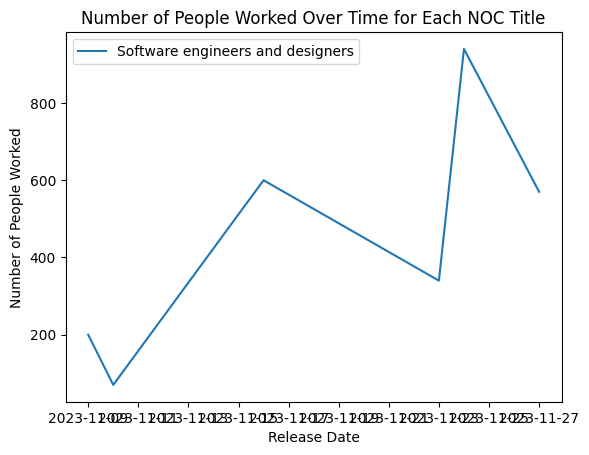

Day 1: 453.0
Day 11: 453.0
Day 21: 455.0
Day 31: 455.0


In [26]:
# line plot of Release Date


# Group by the Release Date and sum the number of people worked


# df_filtered = df[df['NOC Title'] == 'Software engineers and designers']

# Convert 'Release Date' to datetime if it's not already
df['Release Date'] = pd.to_datetime(df['Release Date'])

# Filter for only November month
df_filtered_nov = df[df['Release Date'].dt.month == 11]

# Filter out rows where 'no_of_people_worked' is 0
df_filtered_nov = df_filtered_nov[df_filtered_nov['no_of_people_worked'] != 0]

#group by 'Realase date' and take the max 'no_of_people_worked' for each day and NOC Title
df_filtered_nov = df_filtered_nov.groupby(['Release Date','NOC Title'])['no_of_people_worked'].max().reset_index()



# Group by 'Release Date' and take the max 'no_of_people_worked' for each day
# df_filtered_nov = df_filtered_nov.groupby('Release Date')['no_of_people_worked'].max().reset_index()

#draw the line plot of each NOC Title

fig = px.line(df_filtered_nov, x='Release Date', y='no_of_people_worked',
                    title='Number of People Employed in Software engineers and designers in November 2023',
                    labels={'no_of_people_worked':'Number of People Employed', 'Release Date':'Release Date'},
                    text='no_of_people_worked')


df_filtered_nov


fig = px.line(df_filtered_nov, x='Release Date', y='no_of_people_worked', 
                 title='Number of People Employed in Software engineers and designers in November 2023',
                 labels={'no_of_people_worked':'Number of People Employed', 'Release Date':'Release Date'}
                 ,
                    text='no_of_people_worked')
fig.update_traces(textposition='top center')  # Add this line

# Update x-axis to have a grid line for each day of November
# Update x-axis to have a grid line for each day of November
# Update x-axis to have a grid line for each day of November, add a title, and rotate labels
fig.update_xaxes(
    dtick="D1",
    tickformat="%d",
    title="Day of November",
)
# Update y-axis to have a comma as a thousand separator

fig.update_layout(
    autosize=False,
    width=1000,
    height=800,
)
fig.show()
fig.write_image('Number_of_People_Employed_in_Software_engineers_and_designers_in_November_2023.pdf')

from sklearn.svm import SVR 

# Extract the day from the 'Release Date' and use it as a feature
df_filtered_nov['day'] = df_filtered_nov['Release Date'].dt.day

# Split the data into features (X) and target (y)
X = df_filtered_nov[['day']]
y = df_filtered_nov['no_of_people_worked']

# Train a SVR  model
model = SVR()
model.fit(X, y) # train the model


# Predict the 'no_of_people_worked' for each day of December 2023
december_days = pd.DataFrame({'day': range(1, 32, 10)})  # December has 31 days
predictions = model.predict(december_days)


import numpy as np

predictions_rounded = np.round(predictions)

# Print the predictions
for day, prediction in zip(december_days['day'], predictions_rounded):
    print(f"Day {day}: {prediction}")



#plot the predictions in a line plot
fig = px.line(x=december_days['day'], y=predictions, title='Predicted Number of People Employed in Software engineers and designers in December 2023',
              labels={'x':'Day of December', 'y':'Number of People Employed'},
              text=predictions_rounded)

fig.update_traces(textposition='top center')  # Add this line
fig.show()
fig.write_image('Predicted_Number_of_People_Employed_in_Software_engineers_and_designers_in_December_2023.pdf')


# fig.write_image('Number_of_People_Employed_in_Software_engineers_and_designers_in_November_2023.pdf')